# Linear Regression

Documentation page: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

> `class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)[source]`

 slope:        3.33066907388e-16
coefficient:  [ 1.]
r^2 score:  1.0


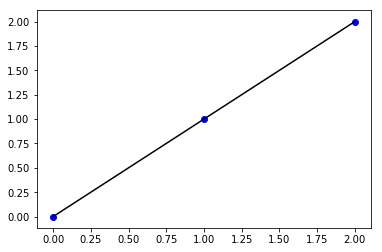

In [13]:
# Required to get in-line images
%matplotlib inline         

import numpy
import matplotlib
import matplotlib.pyplot as plt

# Import the linear model library
from sklearn import linear_model

# create data
X = [[0], [1], [2]]
y = [0, 1, 2]

# Create the object
glm = linear_model.LinearRegression()

# Fit model to data
glm.fit(X, y)

# Pring the coefficient(s)
print 'slope:       ', glm.intercept_
print 'coefficient: ', glm.coef_

print 'r^2 score: ', glm.score(X, y)       # should be done against the test data but....

# Create plot object
# Print X and y as scatter plot
# Print the predicted points as a line
plt.clf()
plt.scatter(X, y, color='b')
plt.plot(X, glm.predict(X), color='black')

## Decision Tree (Classificaiton)

Documentation page for decsion trees: http://scikit-learn.org/stable/modules/tree.html
Documentation for DecisionTreeClassifier class : http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

> class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)[source]

In [43]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

print type(iris)
print iris.keys()
print type(iris.data)
print iris.data[1:10]
print type(iris.target)
print iris.target[1:10]

# Create instance of classifier
clf = tree.DecisionTreeClassifier()
# fit the data to the classifier - Note that it returns a new clf because -- Um shit?
clf = clf.fit(iris.data, iris.target)

print clf

print 'Accuracy = ', clf.score(iris.data, iris.target)

 <class 'sklearn.datasets.base.Bunch'>
['target_names', 'data', 'target', 'DESCR', 'feature_names']
<type 'numpy.ndarray'>
[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
<type 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy =  1.0


### Some parameters

#### min_samples_split 
Minimum sampes requird to keep splitting.

The smaller this value the more likely to over-fit.  The tree can go much deeper.

#### criterion
Select the information gain calculation.  Default is "Gini", but can be set to "entropy".

## Entropy

Is easy to calculate in R, and a bitch in python.  Why, python?  Why?

In [48]:
import numpy as np

class Perceptron:
    """
    This class models an artificial neuron with step activation function.
    """
    def __init__(self, weights = np.array([1]), threshold = 0):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        self.weights = weights
        self.threshold = threshold
    
    def activate(self,inputs):
        """
        Takes in @param inputs, a list of numbers equal to length of weights.
        @return the output of a threshold perceptron with given inputs based on
        perceptron weights and threshold.
        """ 

        # The strength with which the perceptron fires.
        strength = np.dot(self.weights, inputs)

        # TODO: return 0 or 1 based on the threshold
        if strength <= self.threshold :
            self.result = 0
        else:
            self.result = 1
        return self.result


def test():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """
    p1 = Perceptron(np.array([1, 2]), 0.)
    assert p1.activate(np.array([ 1,-1])) == 0 # < threshold --> 0
    assert p1.activate(np.array([-1, 1])) == 1 # > threshold --> 1
    assert p1.activate(np.array([ 2,-1])) == 0 # on threshold --> 0
    
test()

[1 2]
[ 1 -1]
-1
[1 2]
[-1  1]
1
[1 2]
[ 2 -1]
0


## Support Vector Machine (SV)

Multiple kernels can be specified.  Below, the "linear" kernel is selected which will provide linear modeling.  From previous videos this is the (t(x)y) component of the logistic algorithm.  Others are, 'ploy', 'rbf', 'sigmoid', 'precomputed' or a callable function.

In [49]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Naive Bayes

Documentation is at http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [51]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

print(clf_pf.predict([[-0.8, -1]]))

[1]
[1]


## Bayesian optimal classifier code.

Note, this uses concept of _Conditional Independence_ to minimize the calculations required.  This sais that 2 events **A** and **B** are _conditionally indiependent_ given a third event **Y** precicely if the occurence of **A** and **B** are _independent_ evenents in their _conditional probability distribution_ given **Y**.  

Or, knowing the probabilty of **Y** relative to **A** and **B** adds no information.

In [52]:
#------------------------------------------------------------------

#
#   Bayes Optimal Classifier
#
#   In this quiz we will compute the optimal label for a second missing word in a row
#   based on the possible words that could be in the first blank
#
#   Finish the procedurce, LaterWords(), below
#
#   You may want to import your code from the previous programming exercise!
#

sample_memo = '''
Milt, we're gonna need to go ahead and move you downstairs into storage B. We have some new people coming in, and we need all the space we can get. So if you could just go ahead and pack up your stuff and move it down there, that would be terrific, OK?
Oh, and remember: next Friday... is Hawaiian shirt day. So, you know, if you want to, go ahead and wear a Hawaiian shirt and jeans.
Oh, oh, and I almost forgot. Ahh, I'm also gonna need you to go ahead and come in on Sunday, too...
Hello Peter, whats happening? Ummm, I'm gonna need you to go ahead and come in tomorrow. So if you could be here around 9 that would be great, mmmk... oh oh! and I almost forgot ahh, I'm also gonna need you to go ahead and come in on Sunday too, kay. We ahh lost some people this week and ah, we sorta need to play catch up.
'''

corrupted_memo = '''
Yeah, I'm gonna --- you to go ahead --- --- complain about this. Oh, and if you could --- --- and sit at the kids' table, that'd be --- 
'''

data_list = sample_memo.strip().split()

words_to_guess = ["ahead","could"]

def LaterWords(sample,word,distance):
    '''@param sample: a sample of text to draw from
    @param word: a word occuring before a corrupted sequence
    @param distance: how many words later to estimate (i.e. 1 for the next word, 2 for the word after that)
    @returns: a single word which is the most likely possibility
    '''
    
    # TODO: Given a word, collect the relative probabilities of possible following words
    # from @sample. You may want to import your code from the maximum likelihood exercise.
    words = sample.split()
    
    #print "The training set is:", words
    #print "The word is:", word, ".  What is the most likely word", distance, "words after it?"
    
    res = {}
    for i in range(len(words) - 1):
        if word == words[i]:
            n = i+1
            res[words[n]] = res.get(words[n], 0) + 1
                
    s = sum(res.values()) * 1.0

    for k in res:
        res[k] = res[k] / s
        
    #print "The first word(s) after", word, "is/are", res
    
    # TODO: Repeat the above process--for each distance beyond 1, evaluate the words that
    # might come after each word, and combine them weighting by relative probability
    # into an estimate of what might appear next.
    res_n = {}
    for word1 in res:
        res_i = {}
        for i in range(len(words) - 1):
            if word1 == words[i]:
                n = i+distance-1
                res_i[words[n]] = res_i.get(words[n], 0) + 1
                
        s = sum(res_i.values()) * 1.0
        for i in res_i:
            res_i[i] = res[word1] * res_i[i] / s
            
        res_n[word1] = res_i
    
    #for a in res_n:
    #    print "The first words after", a, "is/are:", res_n[a]
        
    best = ''
    prob = 0
    for a in res_n:
        for b in res_n[a]:
            if prob < res_n[a][b]:
                prob = res_n[a][b]
                word = b
                
    return word
    
print LaterWords(sample_memo,"ahead",2)

come
